In [1]:
import os
import pandas as pd
import tensorflow as tf

In [4]:
new_data = pd.read_parquet("./BTCUSDT/")

In [5]:
price = ((new_data["HIGH"] + new_data["LOW"] +
         new_data["CLOSE"]) / 3).loc[1546300800000:]
price.index = pd.to_datetime(price.index, unit="ms") + pd.Timedelta(hours=7)

In [6]:
new_data

,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH
OPEN_TIME,,,,,,,,,,
1502942400000,4261.48,4280.56,4261.48,4261.48,2.189061,9.333621e+03,9,0.489061,2.089105e+03,201708
1502942700000,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000e+00,201708
1502943000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000e+00,201708
1502943300000,4261.48,4264.88,4261.48,4261.48,0.484666,2.065448e+03,9,0.085455,3.642181e+02,201708
1502943600000,4264.88,4266.29,4264.88,4266.29,2.328570,9.931161e+03,11,1.546491,6.595688e+03,201708
...,...,...,...,...,...,...,...,...,...,...
1690386000000,29320.51,29335.46,29314.00,29319.99,77.823440,2.282188e+06,2245,27.277390,7.999347e+05,202307
1690386300000,29319.99,29330.00,29312.50,29330.00,112.466860,3.297404e+06,2181,47.714850,1.398944e+06,202307
1690386600000,29329.99,29337.33,29315.09,29318.82,77.714970,2.279391e+06,2165,24.107450,7.070271e+05,202307


In [7]:
everage_price = price.resample("H").mean().shift(1).dropna()

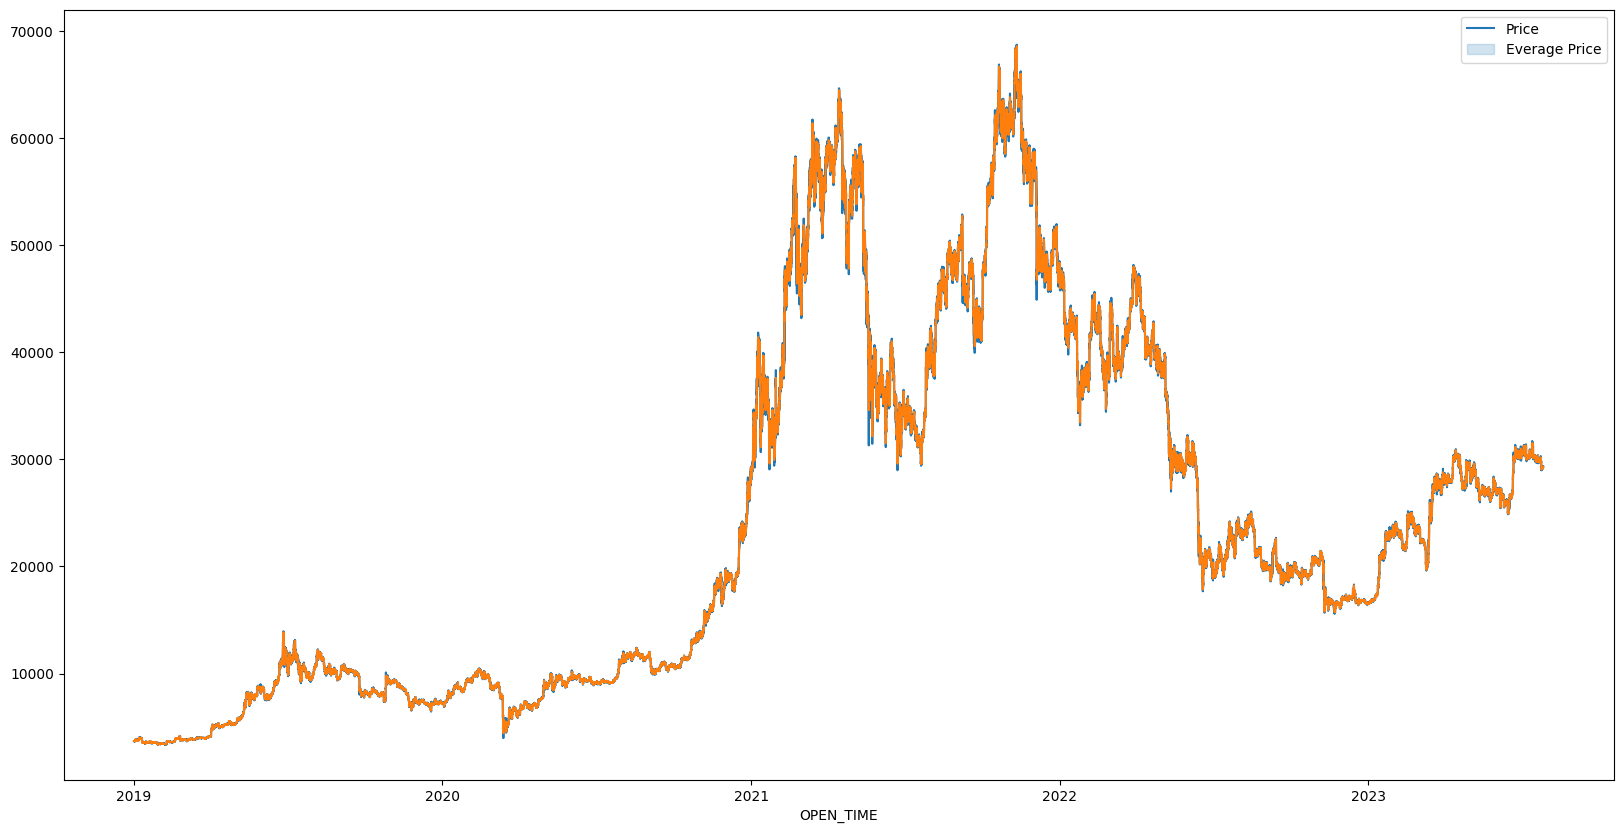

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(2, figsize=(20, 10))
sns.lineplot(x=price.index, y=price.values,legend="auto")
sns.lineplot(everage_price,legend="auto")
plt.legend(['Price', 'Everage Price'])
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaled_data = scaler.fit_transform(everage_price.values.reshape(-1,1))

In [25]:
from ulti import calculate_R_V, make_train_set, model_forecast

training_data = make_train_set(12, scaled_data,1)

In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Bidirectional, GRU, Flatten, Dropout


In [91]:
model = Sequential([
                    Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]),
                    Bidirectional(LSTM(64, return_sequences=True)),
                    Dropout(0.2),
                    LSTM(64),
                    Dropout(0.2),
                    Dense(16, activation='relu'),
                    Dense(1)
])
model.compile(loss='mse', optimizer="adam")
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, None, 32)          128       
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                      

In [92]:
history = model.fit(
    training_data,
    epochs=100
)

Epoch 1/100
313/313 [==============================] - 12s 11ms/step - loss: 0.0034
Epoch 2/100
313/313 [==============================] - 5s 10ms/step - loss: 5.2099e-04
Epoch 3/100
313/313 [==============================] - 4s 9ms/step - loss: 3.8812e-04
Epoch 4/100
313/313 [==============================] - 5s 10ms/step - loss: 2.8353e-04
Epoch 5/100
313/313 [==============================] - 4s 9ms/step - loss: 2.5162e-04
Epoch 6/100
313/313 [==============================] - 5s 12ms/step - loss: 1.8928e-04
Epoch 7/100
313/313 [==============================] - 5s 12ms/step - loss: 1.6521e-04
Epoch 8/100
313/313 [==============================] - 5s 10ms/step - loss: 1.4269e-04
Epoch 9/100
313/313 [==============================] - 5s 10ms/step - loss: 1.4017e-04
Epoch 10/100
313/313 [==============================] - 5s 9ms/step - loss: 1.3237e-04
Epoch 11/100
313/313 [==============================] - 5s 10ms/step - loss: 1.1506e-04
Epoch 12/100
313/313 [=========================

In [93]:
model.save("./drive/MyDrive/data_nestquant2023/nestquant_27_7_moreDense.h5")

In [94]:
# predict_on_train = model_forecast(model, scaled_data, 12)
ds = tf.data.Dataset.from_tensor_slices(scaled_data)
ds = ds.window(12,drop_remainder =True,shift=1)
ds = ds.flat_map(lambda w: w.batch(12))
ds = ds.batch(32,drop_remainder=True).prefetch(1)
predict_on_train = model.predict(ds)

1248/1248 [==============================] - 8s 6ms/step


In [95]:
pr_lb = scaler.inverse_transform(predict_on_train).flatten()

In [96]:
times = pd.date_range(start="2023-01-01",end= pd.Timestamp.now(),freq='H')

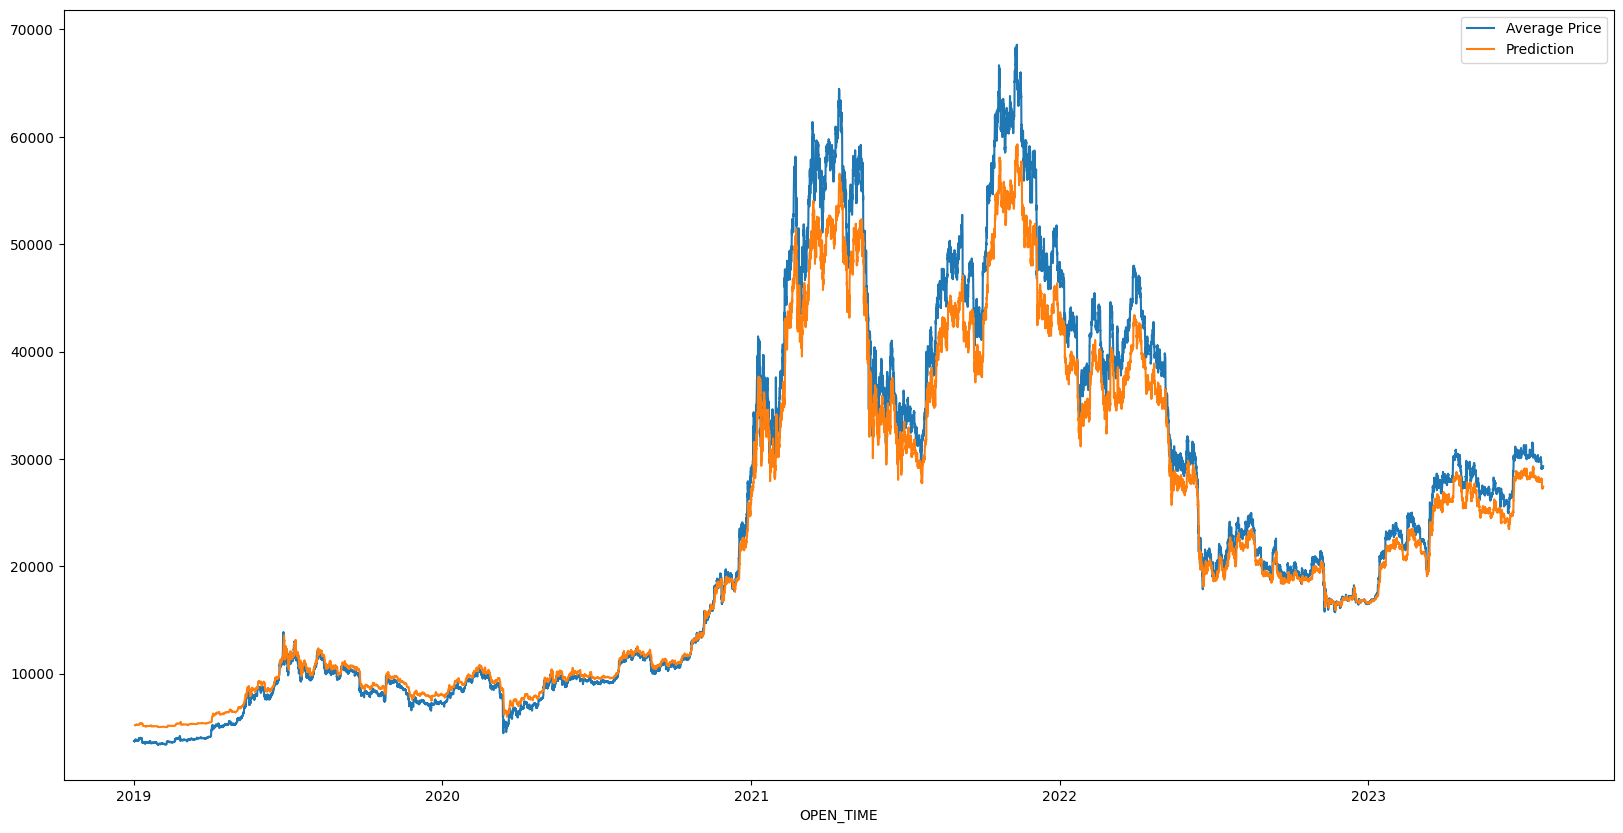

In [97]:
plt.figure(2, figsize=(20, 10))
sns.lineplot(x = everage_price.index, y =everage_price,label='Average Price')
sns.lineplot(x = everage_price.index[-len(pr_lb):], y = pr_lb,label='Prediction')
plt.legend()
plt.show()

In [88]:
pr_lb

array([ 5179.8706,  5180.368 ,  5181.032 , ..., 29847.48  , 29846.354 ,
       29838.21  ], dtype=float32)

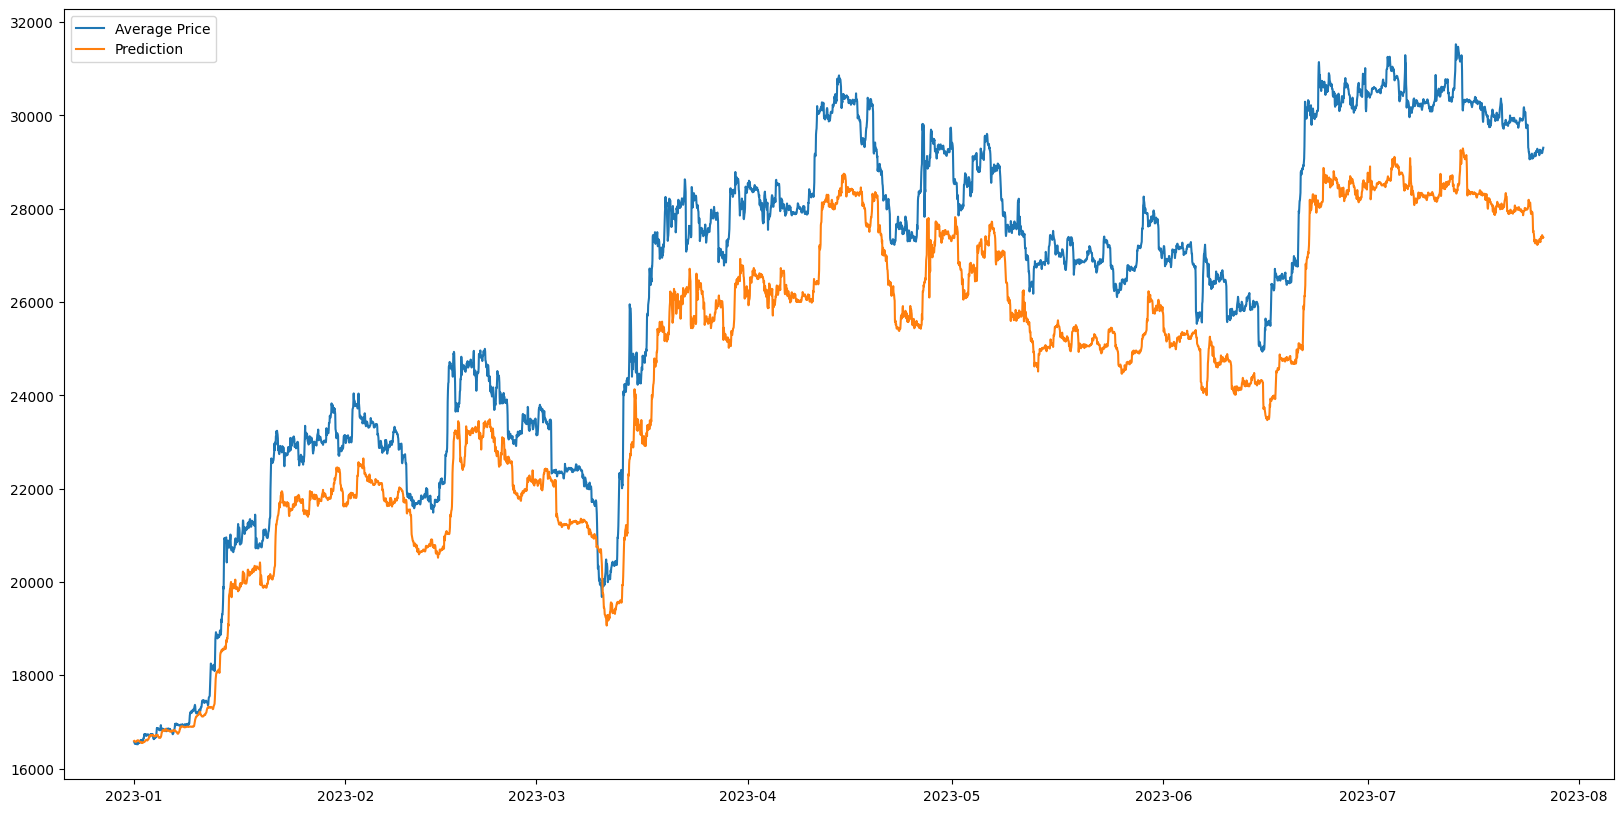

In [98]:
plt.figure(2, figsize=(20, 10))
sns.lineplot(x = times, y =everage_price.iloc[-len(times):],label='Average Price')
sns.lineplot(x = times, y = pr_lb[-len(times):],label='Prediction')
plt.legend()
plt.show()

In [ ]:
# model.save("./drive/MyDrive/data_nestquant2023/nestquant_25_7.h5")

In [ ]:
model

In [ ]:
# New training and test data set
# new_R_V = calculate_R_V(5, btc_price)
# training_data = make_train_set(2, new_R_V[:-2], 1)

In [ ]:
new_R_V.shape

(41, 2)

In [ ]:
# Load the pre-trained model
tf.random.set_seed(1012)
model = tf.keras.models.load_model("./nq.h5")
model.fit(training_data, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1682
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 0.1664
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 0.1649
Epoch 4/5
1/1 [==============================] - 0s 28ms/step - loss: 0.1644
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 0.1643


In [ ]:
# Brownian motion
from sklearn.preprocessing import MinMaxScaler
import numpy as np

mu = 0.1
n = 500
dt = 1e-5
x0 = 1
sigma = 0.3
p_bm = np.exp((mu - sigma**2 / 2) * dt + sigma * np.random.normal(0, dt, n))
p_bm = MinMaxScaler().fit_transform(p_bm.reshape(-1, 1)).flatten()

In [ ]:
predicton = model_forecast(model, new_R_V[-2:], 2).reshape(2)

1/1 [==============================] - 2s 2s/step


## Calculate raw labels and save


In [ ]:
pred_labels = predicton[0] / (
    2 * np.sqrt(predicton[1] * np.random.choice(p_bm, size=1))
)
new_labels = np.vstack((old_labels.values, [pred_labels]))

In [ ]:
pred_labels

array([0.02512586])

In [ ]:
new_labels

array([[-0.00830216],
       [ 0.46791845],
       [ 0.36112607],
       ...,
       [-0.44184655],
       [-0.50214027],
       [ 0.02512586]])

In [ ]:
np.corrcoef(MinMaxScaler().fit_transform(new_labels).reshape(-1),
            labels["LABEL"][-new_labels.shape[0]:].values)

array([[1.        , 0.05534448],
       [0.05534448, 1.        ]])

In [ ]:
pd.DataFrame(new_labels).to_csv("./data/labels.csv")

In [ ]:
MinMaxScaler().fit_transform(new_labels)

array([[0.46654576],
       [0.49464918],
       [0.488347  ],
       ...,
       [0.44096082],
       [0.43740268],
       [0.46851847]])

In [ ]:
import matplotlib.pyplot as plt

sns.lineplot(data=MinMaxScaler().fit_transform(new_labels))
plt.show()
sns.lineplot(data=MinMaxScaler().fit_transform(old_labels))

NameError: name 'sns' is not defined

In [ ]:
# Calculate scaled prediction
prediction = MinMaxScaler().fit_transform(new_labels)[-1][0]
submit_hour = (pd.Timestamp.now().ceil(freq="H") -
               pd.Timedelta("7H")).value // 10**6
print(submit_hour)

1690218000000


In [ ]:
prediction

0.46851846665873204

In [ ]:
submission = pd.DataFrame(
    index=[0], data={"OPEN_TIME": submit_hour, "PREDICTION": prediction}
)
# submission = submission.to_dict(orient="records", index=True)
submission.to_csv("./data/submission.csv", index=False)

In [ ]:
new_R_V[:-15].shape

(402, 2)

In [ ]:
from submit import Submission

api_submit = Submission(api_key=os.getenv("API_KEY"))
api_submit.submit(False, submission, "BTCUSDT")

'1690123004422'

In [ ]:
model.save("./nq.h5")

c:\Users\nguye\Downloads\NestQuant\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
